In [1]:
import sys
sys.path.append('../src')

[INFO] Fetching stock data for AAPL from 2020-01-01 to 2024-12-31


/home/oxy/repo/ar-cashflow-forecasting/notebooks/../src/ingestion/data_loader.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
23:14:27 - cmdstanpy - INFO - Chain [1] start processing


[DEBUG] Flattened columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
[DEBUG] Incoming columns: ['Date', 'Close', 'Volume']
[DEBUG] Mapped: Date -> date, Close -> close, Volume -> volume


23:14:27 - cmdstanpy - INFO - Chain [1] done processing


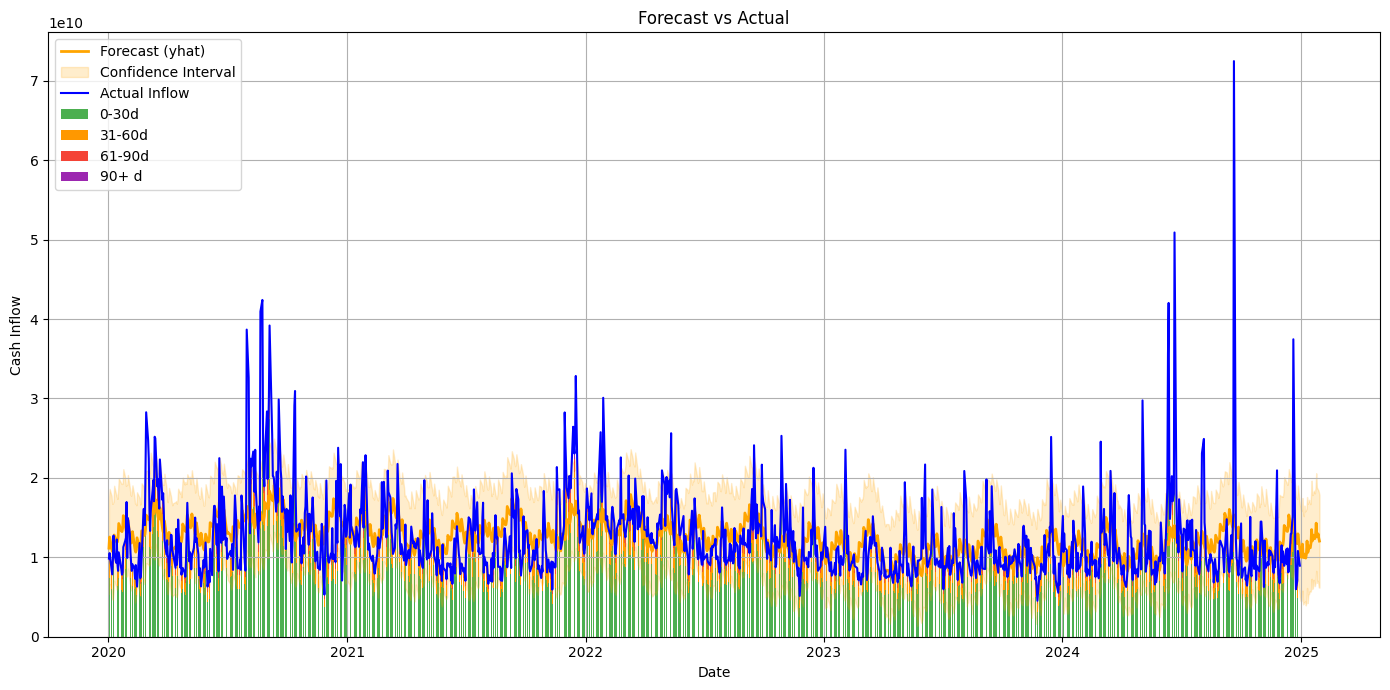

[INFO] Forecast saved to ../data/forecast/aapl_forecast_30d.csv


In [3]:
from ingestion.data_loader import fetch_stock_data, simulate_cash_inflow
from processing.data_cleaner import clean_stock_data
from forecasting.prophet_forecaster import forecast_cash_inflow, export_forecast_to_csv, plot_forecast_with_aging
from features.ar_aging import compute_aging_buckets

# Step 1: Load data
df = fetch_stock_data('AAPL', '2020-01-01', '2024-12-31')
df = clean_stock_data(df)
df = simulate_cash_inflow(df)

# Step 2: Forecast
forecast, model = forecast_cash_inflow(df, periods=30)

# Prepare aging
aging_df = compute_aging_buckets(df)

# Step 3: Plot
plot_forecast_with_aging(forecast, df_actual=df, aging_df=aging_df)

# Step 4: Export
export_forecast_to_csv(forecast, "../data/forecast/aapl_forecast_30d.csv")

In [ ]:
from evaluation.backtest import backtest_prophet
from forecasting.prophet_forecaster import plot_forecast_with_aging

metrics, forecast, model = backtest_prophet(df, forecast_days=30)
print("Evaluation Metrics:")
print(metrics)

plot_forecast_with_aging(forecast, df_actual=df, aging_df=aging_df)

23:15:10 - cmdstanpy - INFO - Chain [1] start processing
23:15:10 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics:
{'MAPE': 23.24, 'RMSE': np.float64(3561424389.67)}


KeyError: 'bucket_0_30'

<Figure size 1400x700 with 0 Axes>